#CNNs on MNIST

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
1875/1875 [==============================] - 73s 37ms/step - loss: 0.1476 - accuracy: 0.9548 - val_loss: 0.0486 - val_accuracy: 0.9855
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0477 - accuracy: 0.9850 - val_loss: 0.0429 - val_accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0337 - accuracy: 0.9891 - val_loss: 0.0365 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0287 - val_accuracy: 0.9914
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0202 - accuracy: 0.9932 - val_loss: 0.0361 - val_accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0171 - accuracy: 0.9941 - val_loss: 0.0295 - val_accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 58s

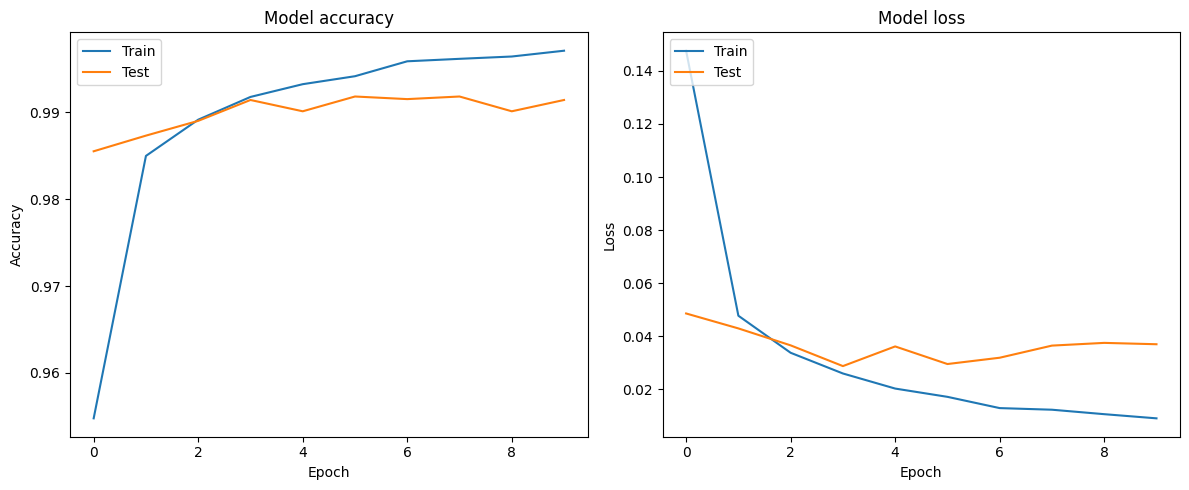

313/313 [==============================] - 3s 9ms/step - loss: 0.0369 - accuracy: 0.9914
Test accuracy: 99.14%
1/1 [==============================] - 0s 121ms/step


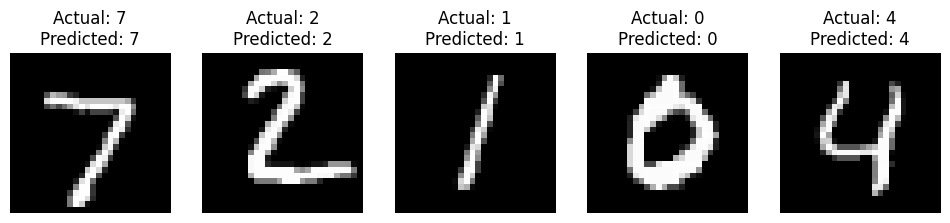

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Define a simple CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Make predictions on a few test samples
predictions = model.predict(test_images[:5])

# Plot the actual vs predicted labels for a few test samples
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {tf.argmax(test_labels[i]).numpy()}\nPredicted: {tf.argmax(predictions[i]).numpy()}")
    plt.axis('off')

plt.show()


# visualise CNNs on an image using VGG16 model

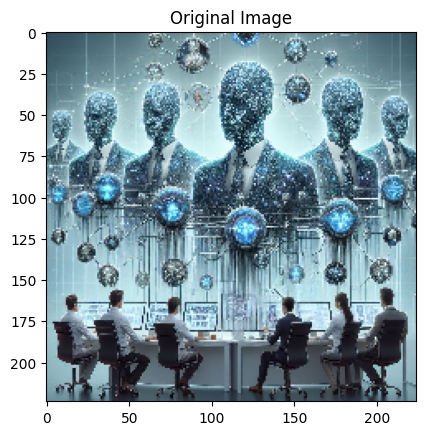

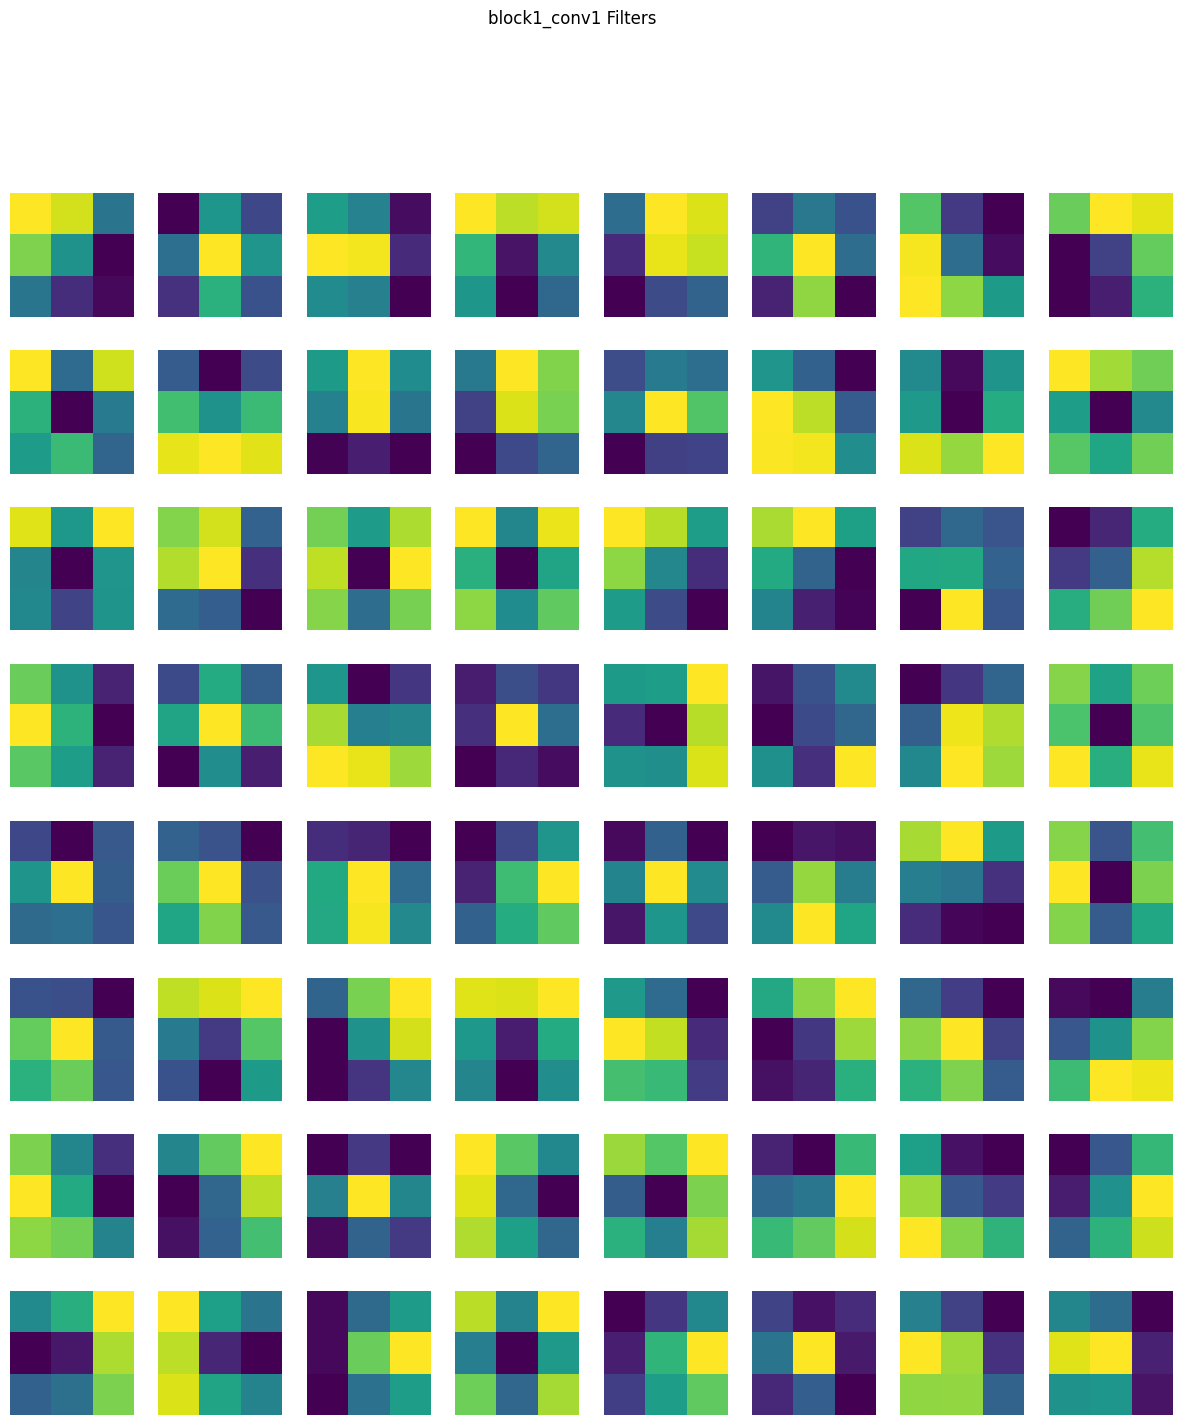

1/1 [==============================] - 0s 131ms/step


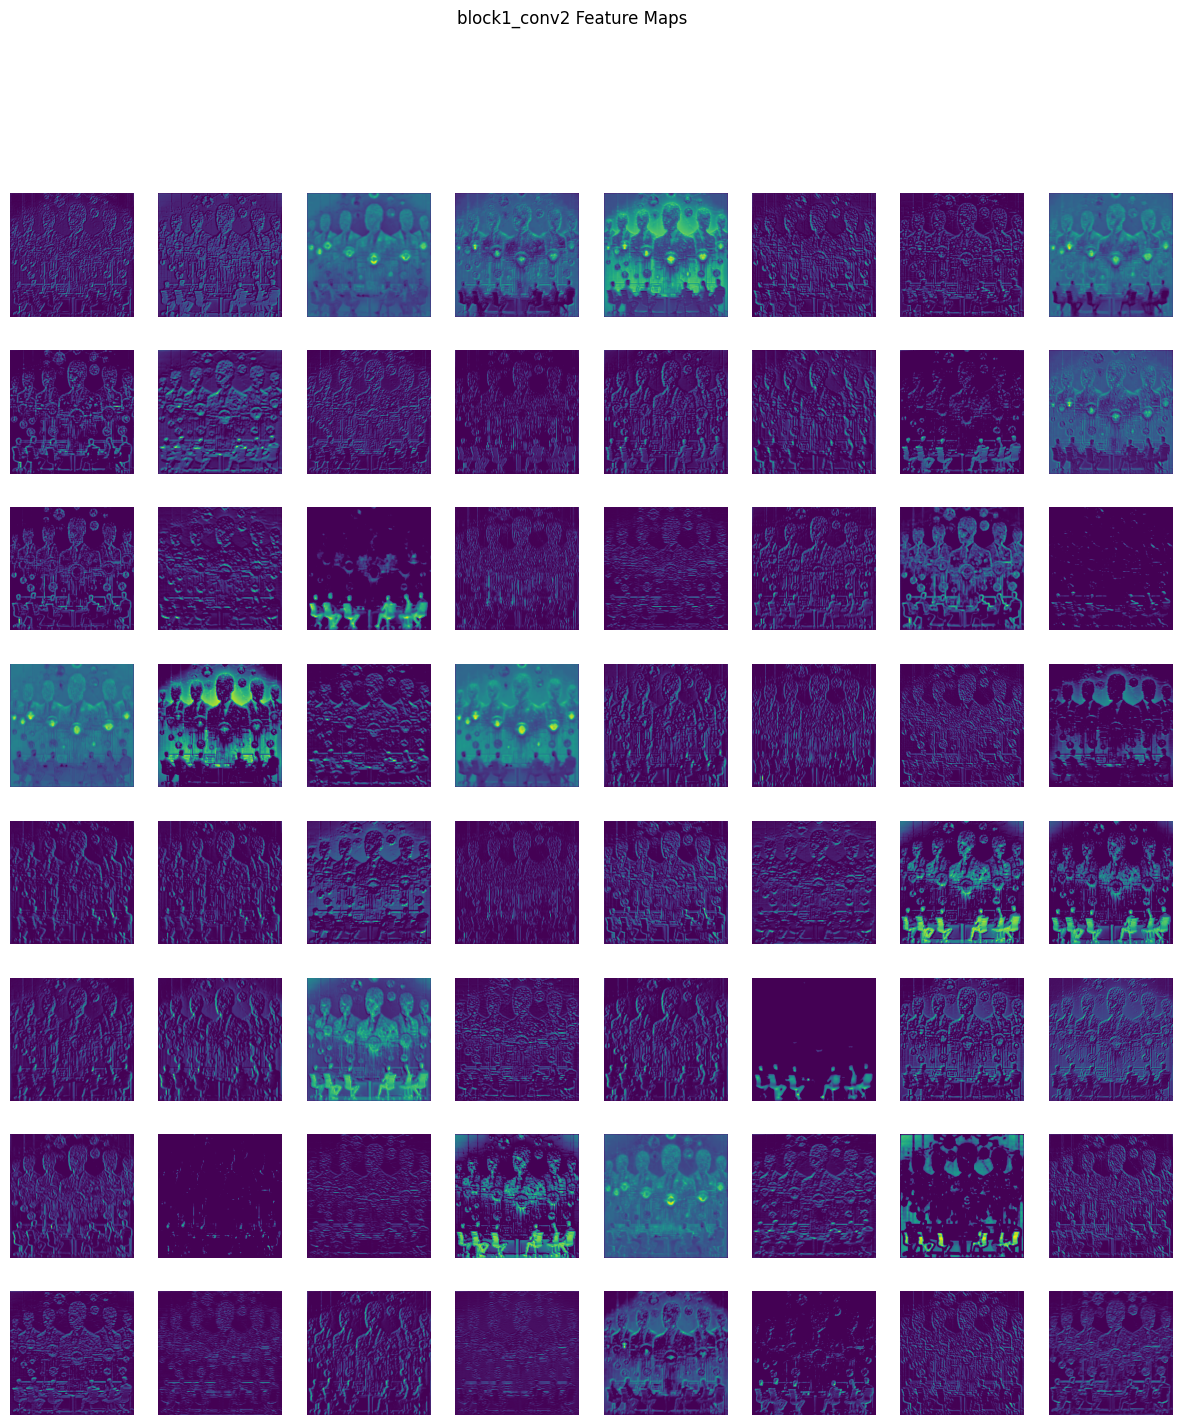

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load a pre-trained CNN model (replace with your model)
model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)

# Select a sample image for visualization
img_path = '/content/mixtral.jpeg'  # Replace with the path to your image

img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.vgg16.preprocess_input(img_array)

# Visualize the original image
plt.imshow(img)
plt.title('Original Image')
plt.show()

# Visualize the filters of the first convolutional layer
layer_name = 'block1_conv1'
layer = model.get_layer(name=layer_name)
filters, biases = layer.get_weights()

# Normalize filter values to the range [0, 1] for visualization
filters = (filters - np.min(filters)) / (np.max(filters) - np.min(filters))

# Plot each filter dynamically
num_filters = filters.shape[3]
num_rows = num_filters // 8 + 1  # Adjust the number of rows based on the number of filters

plt.figure(figsize=(15, 2 * num_rows))
for i in range(num_filters):
    plt.subplot(num_rows, 8, i + 1)
    plt.imshow(filters[:, :, 0, i], cmap='viridis')
    plt.axis('off')

plt.suptitle(f'{layer_name} Filters')
plt.show()

# Visualize feature maps for a specific layer
layer_name = 'block1_conv2'
feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=model.get_layer(name=layer_name).output)
feature_maps = feature_extractor.predict(img_array)

# Plot the feature maps dynamically
num_feature_maps = feature_maps.shape[3]
num_rows = num_feature_maps // 8 + 1  # Adjust the number of rows based on the number of feature maps

plt.figure(figsize=(15, 2 * num_rows))
for i in range(num_feature_maps):
    plt.subplot(num_rows, 8, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.suptitle(f'{layer_name} Feature Maps')
plt.show()

